# Resistencia Hidráulica

![IPython](images/profile-velocity.png)

Descargar la bibliografía de [Keulegan (1938)](https://gitlab.com/ldominguezruben/hidrodinamica-de-cuerpos-de-agua-fich-unl/-/blob/master/web/book/notebooks/ref/jresv21n6p707_A1b.pdf)

## Ley de la pared

$$\frac{u}{u_*}=\frac{1}{\kappa}\ln(y/y_0)$$

Donde: $y_0$ es con constante de integración

#### Para superficies suaves

$$m=\frac{y_0 u_*}{\nu}$$

donde:
*    m: constante
*    $\nu$ viscosidad cinematica

$$\frac{u}{u_*}=a_s+\frac{1}{\kappa}\ln\left(\frac{yu_*}{\nu}\right)$$ o

$$\frac{u}{u_*}=a_s+\frac{2.3}{\kappa}\ln\left(\frac{yu_*}{\nu}\right)$$
Donde

$$a_s=\frac{1}{\kappa}\ln \left(\frac{1}{m}\right)$$

De los ensayos en laboratorio de Nikuradse:

$$\frac{u}{u_*}=5.05+5.75\log\left(\frac{yu_*}{\nu}\right)$$

#### Para superficies rugosas

![IPython](images/rughness.png)

#### Superficie rugosas suaves

$$\frac{y_0u_*}{\nu}=f\left(\frac{k}{L}\right)$$
Donde:
* L: longitud de onda (rugosidad)
* k: altura de onda (rugosidad)
* la relación $\frac{k}{L}$ se denomina ondulación relativa

$$ \frac{u}{u_*}=a_w+\frac{1}{\kappa}\ln\left(\frac{yu_*}{\nu}\right)$$ 

o

$$\frac{u}{u_*}=a_w+\frac{2.3}{\kappa}\ln\left(\frac{yu_*}{\nu}\right)$$

#### Superficie rugosas

$$\frac{y_0u_*}{\nu}=f\left(\frac{ku_*}{L}\right)$$

$$ \frac{u}{u_*}=a_r+\frac{1}{\kappa}\ln\left(\frac{yu_*}{\nu}\right)$$ 

o

$$\frac{u}{u_*}=a_r+\frac{2.3}{\kappa}\ln\left(\frac{yu_*}{\nu}\right)$$

Relación entre $a_r$ y número de Reynolds

$$f\left(\frac{ku_*}{\nu}\right)=e^{-\kappa a_r}$$

![IPython](images/roughness.png)

$$ a_r=8.5-2.5\ln\left(\frac{k_su_*}{\nu}\right)=8.5-5.75\log\left(\frac{k_su_*}{\nu}\right)$$

Sustituyendo la ecuación previa

$$\frac{u}{u_*}=8.5+5.75\log\left(\frac{y}{k_s}\right)$$

## Ley de Máximos

$$ \frac{u_{max}-u}{u_*}= 5.75 \log\left(\frac{h}{h-z}\right)$$

Donde:
*   u: es la velocidad en el punto z
*   z: es la distancia medida desde la superficie
*   h: es la profundidad del perfil vertical

## Ajuste Parabólico

$$ \frac{u_{max}-u}{u_*}= \frac{u_*}{2 \nu_t} (1-\epsilon)²$$

Donde:
$\epsilon = z/H$ y $\nu_t =0.077 u_* H$

## Ley de Manning

$$\bar{u}=\frac{1.476}{n}R^{1/6}\sqrt{Ri}$$

Esto se puede expresar de la siguiente manera

$$\frac{\bar{u}}{\bar{u_*}}=\frac{0.263}{n}R^{1/6}$$

![IPython](images/roughness2.png)

Para la linea 1-1

$$\frac{u}{u_*}=\frac{u}{\bar{u_*}}=9.15\left(\frac{y}{k_s}\right)^{1/6}$$

Para la linea 2-2

$$\frac{u}{u_*}=\frac{u}{\bar{u_*}}=10.2\left(\frac{y}{k_s}\right)^{1/7}$$

Cauces naturales. Guia para la determinación del coeficiente de [Manning](https://pubs.usgs.gov/wsp/2339/report.pdf)

## Hacemos un caso práctico

In [1]:
import pandas as pd

#tomamos los datos del repositorio

df =pd.read_csv('data/wind.csv', sep =',',names=['Depth from bottom','Vel'])
df.head()

Depth from bottom       Vel
0           0.000079  3.084383
1           0.000104  3.875034
2           0.000138  4.793273
3           0.000174  5.841146
4           0.000222  6.765289

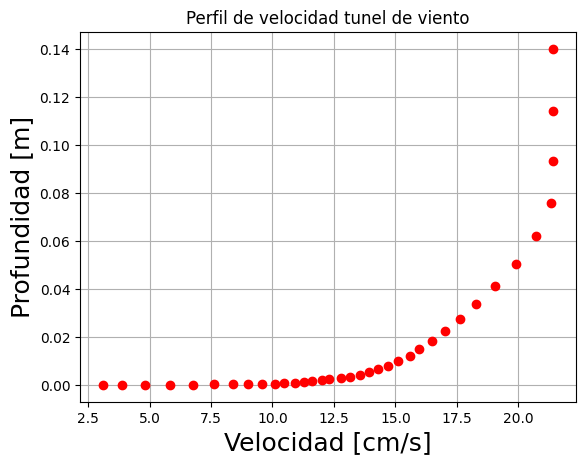

In [2]:
#Graficamos los puntos
import numpy as np
import matplotlib.pyplot as plt

plt.plot(df['Vel'],df['Depth from bottom'],'or')

plt.title(f'Perfil de velocidad tunel de viento')
plt.xlabel('Velocidad [cm/s]', fontsize = 18)
plt.ylabel('Profundidad [m]', fontsize = 18)
plt.grid()
plt.show()


coefficient value in case of quadratic polynomial:
 [ 2.36759208 26.57915093]


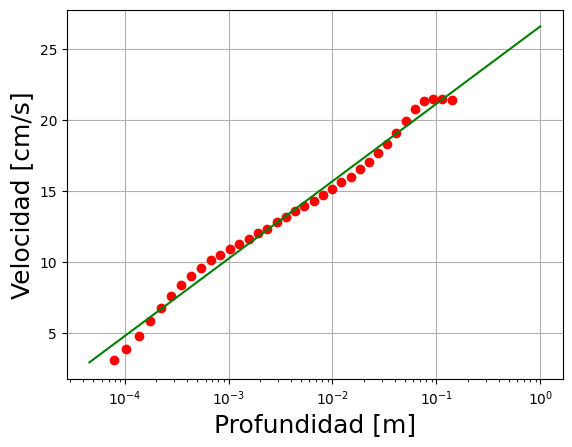

In [3]:
#ploteamos semilog
plt.semilogx(df['Depth from bottom'],df['Vel'], 'or' )


linear_model=np.polyfit(np.log(df['Depth from bottom']),df['Vel'],1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,-10,-0.01)
plt.semilogx(np.exp(x_s),linear_model_fn(x_s),color="green")
print("\ncoefficient value in case of quadratic polynomial:\n", linear_model)


plt.grid()
plt.ylabel('Velocidad [cm/s]', fontsize = 18)
plt.xlabel('Profundidad [m]', fontsize = 18)
plt.show()